In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


Dataset

In [2]:
# Load the dataset
df1 = pd.read_csv('/content/tmdb_5000_credits.csv')
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
# Get the basic info of the data
df1.shape
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [4]:
# Load the second dataset: Movies dataset
df2 = pd.read_csv('/content/tmdb_5000_movies.csv')
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
# Merge the two dataframes
df1.columns = ['id','title','cast','crew']
df2= df2.merge(df1,on='id')
df2.head()
df2.shape
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [6]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

In [7]:
df2 = df2.rename(columns={"title_x": "title"}).drop(columns=["title_y"])


In [8]:
# Parse the features into their corresponding python objects

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [9]:
#Get the director's name
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [10]:
#Returns the list
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
  # Check if more than 3 elements exist. If yes return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    return []

In [11]:
#Define new features that are in suitable form
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [12]:
# Print the new features of first 5 films
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(5)


,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"


In [13]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        # To check if director exists
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [14]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

### Creating MetaData

In [15]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)


In [16]:
df2 = df2.reset_index(drop=True)

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df2['soup'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)



In [17]:
# Indices mapping
df2 = df2.reset_index(drop=True)
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

# Recommendation function
def get_recommendations(title, n=10, cosine_sim=cosine_sim):
    if title not in indices:
        return pd.Series([], dtype=object)
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:n+1]
    movie_indices = [i[0] for i in sim_scores]
    return df2['title'].iloc[movie_indices]

In [18]:
# Reset index of main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

### Make Recommendations

In [19]:
get_recommendations('JFK')

,title
1528,Criminal
884,Zero Dark Thirty
737,Jack Ryan: Shadow Recruit
188,Salt
969,Assassins
2141,Milk
2503,The Homesman
484,The Postman
2008,In the Valley of Elah
2278,Dances with Wolves


In [20]:
get_recommendations('The Godfather')

,title
867,The Godfather: Part III
1525,Apocalypse Now
2731,The Godfather: Part II
4124,This Thing of Ours
4147,Small Apartments
2649,The Son of No One
1170,The Talented Mr. Ripley
512,Wanted
1225,Mickey Blue Eyes
1209,The Rainmaker


In [21]:
get_recommendations('Avatar')

,title
2403,Aliens
206,Clash of the Titans
587,The Abyss
43,Terminator Salvation
132,Wrath of the Titans
282,True Lies
1448,Sabotage
47,Star Trek Into Darkness
3439,The Terminator
3184,The Ice Pirates


In [22]:
get_recommendations('The Matrix')

,title
123,The Matrix Revolutions
125,The Matrix Reloaded
93,Terminator 3: Rise of the Machines
1767,Suspect Zero
266,"I, Robot"
487,Red Planet
1725,Blade Runner
1306,Dragon Nest: Warriors' Dawn
1280,Disturbia
43,Terminator Salvation


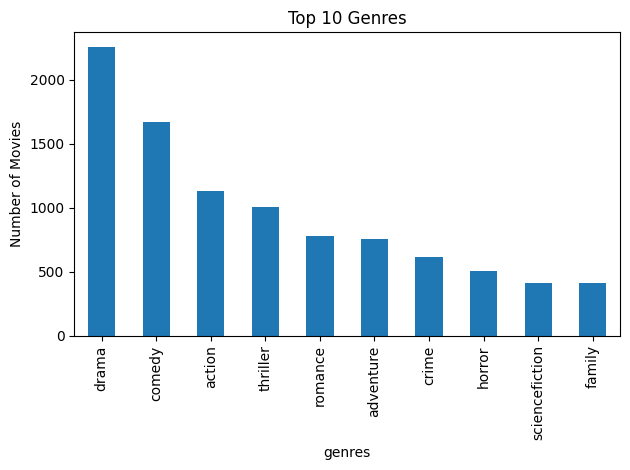

In [23]:
import matplotlib.pyplot as plt

all_genres = df2['genres'].explode()
all_genres.value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Genres')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()


In [24]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

# Function to get top K similar movie indices
def get_topk_indices(idx, K=10, similarity_matrix=cosine_sim):

    # Pairwise similarity scores
    sim_scores = list(enumerate(similarity_matrix[idx]))

    # Sort movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get scores of K most similar movies
    sim_scores = sim_scores[1 : K + 1]

    # Get  movie indices
    movie_indices = [i[0] for i in sim_scores]
    return movie_indices

# To check if a recommended movie is relevant based on genre
def is_relevant_by_genre(query_movie_genres, recommended_movie_genres):
    query_genres_set = set(query_movie_genres)
    recommended_genres_set = set(recommended_movie_genres)
    return len(query_genres_set.intersection(recommended_genres_set)) > 0


In [25]:
SIM = cosine_sim

# Ensuring genres are sets of names
def to_genre_set(x):
    if isinstance(x, list):
        # list of dictionary
        names = []
        for el in x:
            if isinstance(el, dict):
                names.append(el.get('name', ''))
            elif isinstance(el, str):
                names.append(el)
        return set([n for n in names if n])
    return set()

df2['genre_set'] = df2['genres'].apply(to_genre_set)

# Helpers
def is_relevant_by_genre(g1, g2):
    return len(g1 & g2) > 0

def get_topk_indices(idx, K=10):
    sims = SIM[idx]
    order = np.argsort(-sims)            # descending similarity
    order = order[order != idx][:K]      # excluding movie itself
    return order

# Evaluate over sample of query movies
K = 10
n_samples = min(200, len(df2))
rng = np.random.default_rng(42)
sample_indices = rng.choice(len(df2), size=n_samples, replace=False)

all_y_true, all_y_pred = [], []

for idx in sample_indices:
    q_genres = df2.iloc[idx]['genre_set']
    rec_idx = get_topk_indices(idx, K=K)

    for j in rec_idx:
        r_genres = df2.iloc[j]['genre_set']
        # ground truth: share at least one genre
        all_y_true.append(1 if is_relevant_by_genre(q_genres, r_genres) else 0)
        all_y_pred.append(1)

# Evaluation Metrics
accuracy_at_k  = accuracy_score(all_y_true, all_y_pred)
precision_at_k = precision_score(all_y_true, all_y_pred, zero_division=0)
recall_at_k    = recall_score(all_y_true, all_y_pred, zero_division=0)
f1_at_k        = f1_score(all_y_true, all_y_pred, zero_division=0)

print(f"--- Evaluation Metrics (K={K}) ---")
print(f"Accuracy@{K}:  {accuracy_at_k:.3f}")
print(f"Precision@{K}: {precision_at_k:.3f}")
print(f"Recall@{K}:    {recall_at_k:.3f}")
print(f"F1-Score@{K}:  {f1_at_k:.3f}")


--- Evaluation Metrics (K=10) ---
Accuracy@10:  0.810
Precision@10: 0.810
Recall@10:    1.000
F1-Score@10:  0.895


### Cosine Similarity Matrix (`cosine_sim2`)

In [26]:

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.07121855 0.03721726 ... 0.         0.         0.        ]
 [0.07121855 1.         0.03911498 ... 0.         0.         0.        ]
 [0.03721726 0.03911498 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
